In [1]:
!pip install wordcloud
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install spacy

In [2]:
import gdown
import pandas as pd

# URL Google Drive
url = "https://drive.google.com/uc?export=download&id=1UR_MC8Q5K4JSRnSUX5MQ-sIGPjLLnm9f"

output = "data.csv"
#gdown.download(url, output, quiet=False, fuzzy=True)

# Charger le fichier CSV
df = pd.read_csv(output)

# Vérifier les premières lignes
print(df.head())


                                         identifiant    journal journal_clean  \
0  4e1a85867f3ab0b0c169e743745bcbf56be622f879f87f...  Sud Ouest     Sud Ouest   
1  c651038ff3e564f20f33c42baf93ec7705da83241db7cc...  Sud Ouest     Sud Ouest   
2  89c84d8d9d1bd2cbccf227d3174b460119aef370308d1a...  Sud Ouest     Sud Ouest   
3  6a3e05da14fd03e838d45b53e93f0ee88aedb74d387d18...  Sud Ouest     Sud Ouest   
4  a7f66fb8536a970383ff1949c9da7b0695ff381254b2af...  Sud Ouest     Sud Ouest   

                                               titre  \
0  [GIRONDE BORDEAUX ASSISES BLANQUEFORT Mauvais...]   
1    [• Jeudi 22 février 1990:53'Jour de l'année...]   
2  [TV/SAMEDI 10 MARS * • à ne pas manquer * * in...   
3  [TÉLÉVISION ic Sports 3 Dimanche » arrive ^ Os...   
4           [GIRONDE TUSTICE SANTÉ Michel Naphle...]   

                                          complement  annee  mois  jour  \
0  Bordeaux,         mercredi 17 janvier 1990 313...   1990     1    17   
1  Bordeaux,         jeudi

In [3]:
column_names = df.columns.tolist()
print(column_names)

['identifiant', 'journal', 'journal_clean', 'titre', 'complement', 'annee', 'mois', 'jour', 'heure', 'minute', 'seconde', 'date', 'epoch', 'auteur', 'texte', 'keywords', 'langue', 'url']


In [4]:
new_df=df.drop(columns=['identifiant','heure','minute','seconde','date','epoch','auteur','langue','url','journal','complement'])

In [5]:
print(new_df.tail(10))

               journal_clean  \
82202  Yahoo! Finance France   
82203             Nice-Matin   
82204              Sud Ouest   
82205              Sud Ouest   
82206             20 Minutes   
82207                    AFP   
82208             Midi Libre   
82209          L'Indépendant   
82210                 TV Mag   
82211             Midi Libre   

                                                   titre  annee  mois  jour  \
82202  Justice : Enquête après une plainte de Sara Fo...   2024    12     5   
82203  Affaire Adèle Haenel: le réalisateur Christoph...   2024    12     5   
82204  Soupçonné d’un viol, il est interpellé dix moi...   2024    12     5   
82205  Soupçonné d'un viol en pleine rue à Bordeaux, ...   2024    12     5   
82206  Enquête après une plainte de Sara Forestier co...   2024    12     5   
82207  #Metoo français: l'affaire Adèle Haenel devant...   2024    12     5   
82208  "Je sortais d'une chimiothérapie" : une femme ...   2024    12     5   
82209  "C'est c

In [6]:
#Premiers test sur seulement trois journaux

journaux_selectionnes = ["Le Monde", "Le Figaro", "Libération"]
new_df = new_df[new_df["journal_clean"].isin(journaux_selectionnes)]



In [9]:
import spacy
nlp = spacy.load("fr_core_news_md")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Dictionnaire des types de violences avec leurs mots-clés associés
types_violences = {
    'Meurtre': ['meurtre', 'assassinat', 'homicide'],
    'Homicide involontaire': ['homicide involontaire', 'accident mortel'],
    'Coups et blessures': ['agression', 'violence', 'coups', 'blessure'],
    'Agression sexuelle': ['viol', 'harcèlement', 'abus sexuel'],
    'Attentat': ['attentat', 'terrorisme', 'bombe'],
    'Disparition': ['disparition', 'kidnapping', 'enlèvement'],
    'Attaque': ['attaque', 'agression', 'violence armée'],
    'Autre': ['violence', 'abus', 'maltraitance'],
    'Empoisonnement': ['empoisonnement', 'toxicité', 'substance nocive']
}


stop_words = 'stop_word_fr.txt'

def nettoyer_texte(texte):
    if not isinstance(texte, str):  
        return ""
    texte_doc = nlp(texte.lower())
    mots_pertinents = [token.lemma_ for token in texte_doc if token.text not in stop_words and not token.is_punct]
    return " ".join(mots_pertinents)


new_df['texte'] = new_df['texte'].fillna("")


docs = list(nlp.pipe(new_df['texte'].astype(str), batch_size=50, disable=["ner", "parser"]))


new_df['texte_propre'] = [" ".join([token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]) for doc in docs]

def classifier_article(texte_propre):
    """ Classe un article en fonction des types de violences définis """
    for categorie, mots_cles in types_violences.items():
        for mot in mots_cles:
            if f" {mot} " in f" {texte_propre} ":
                return categorie
    return 'Autre'

new_df['categorie'] = new_df['texte_propre'].apply(classifier_article)


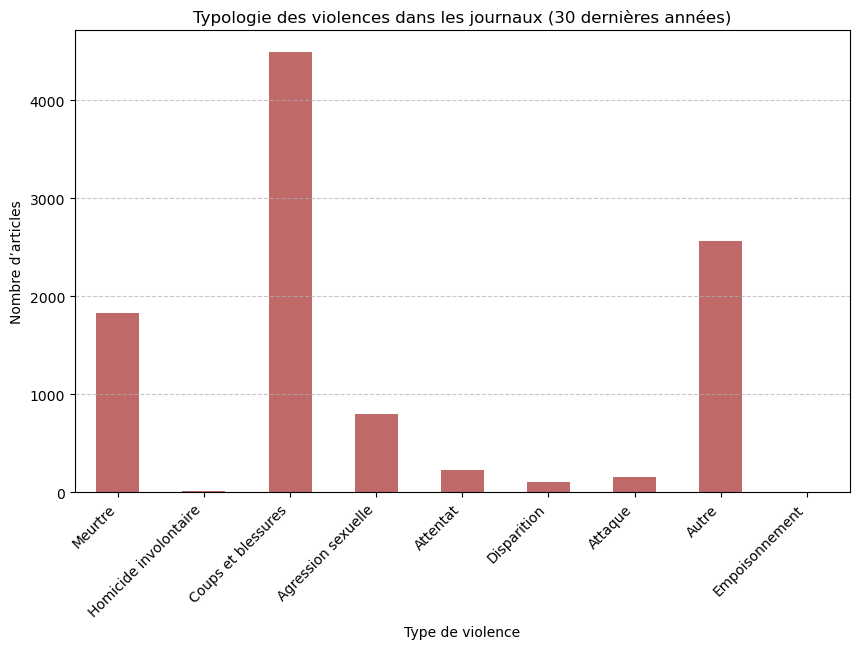

In [14]:
distribution = new_df['categorie'].value_counts()
distribution = distribution.reindex(types_violences.keys(), fill_value=0)

if not distribution.empty:
    plt.figure(figsize=(10,6))
    distribution.plot(kind='bar', color='brown', alpha=0.7)
    plt.title('Typologie des violences dans les journaux (30 dernières années)')
    plt.xlabel('Type de violence')
    plt.ylabel('Nombre d’articles')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Aucune donnée à afficher dans la distribution.")



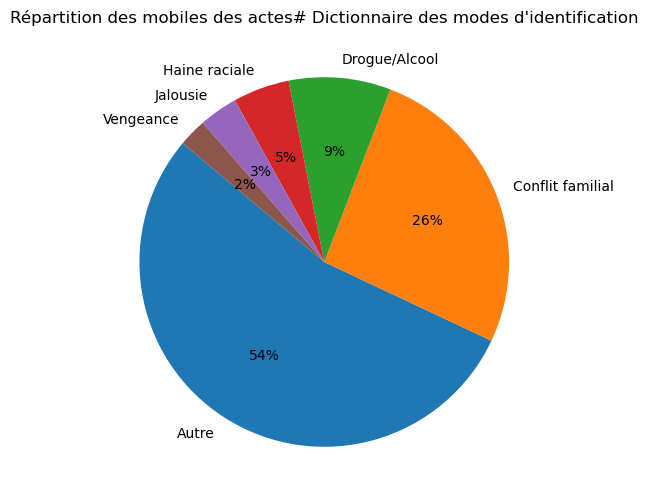

In [15]:
mobiles_violences = {
    'Vengeance': ['vengeance', 'représailles', 'rancune', 'règlement de comptes'],
    'Jalousie': ['jalousie', 'infidélité', 'rivalité', 'trahison'],
    'Drogue/Alcool': ['drogue', 'alcool', 'ivresse', 'stupéfiant'],
    'Conflit familial': ['dispute', 'famille', 'séparation', 'divorce','inceste'],
    'Haine raciale': ['racisme', 'xénophobie', 'homophobie', 'discrimination'],
    'Autre': ['différend', 'querelle', 'inconnu']
}


def classifier_mobile(texte_propre):
    for mobile, mots_cles in mobiles_violences.items():
        for mot in mots_cles:
            if mot in texte_propre:
                return mobile
    return 'Autre'


new_df['mobile'] = new_df['texte_propre'].apply(classifier_mobile)


distribution = new_df['categorie'].value_counts()
distribution = distribution.reindex(types_violences.keys(), fill_value=0)

mobile_counts = new_df['mobile'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(mobile_counts, labels=mobile_counts.index, autopct='%1.0f%%', startangle=140)
plt.title("Répartition des mobiles des actes# Dictionnaire des modes d'identification")
plt.show()


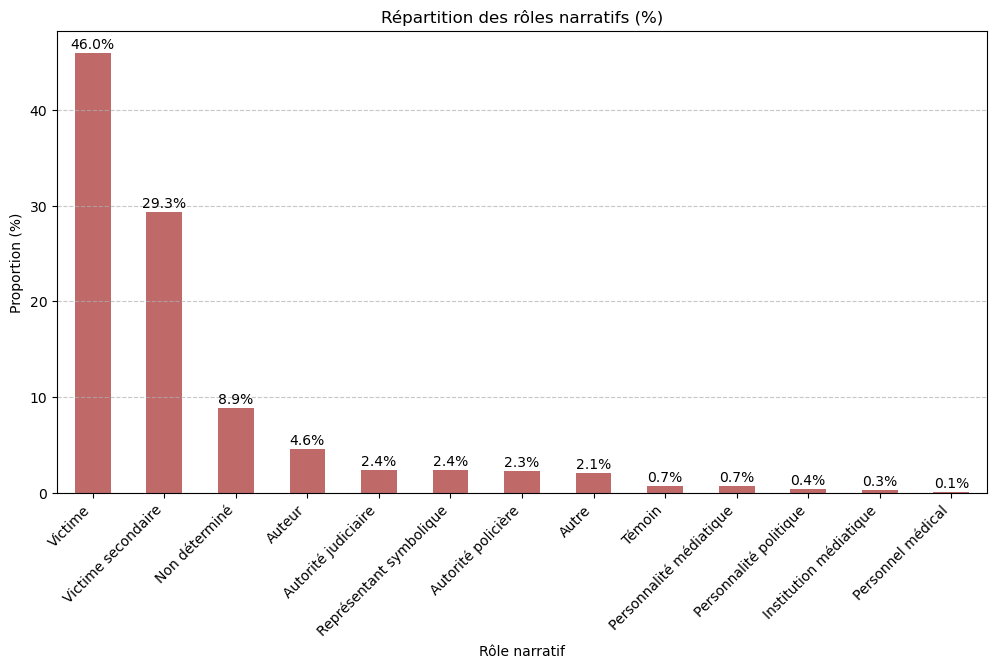

In [16]:


roles_narratifs = {
    'Non déterminé': ['indéterminé', 'inconnu'],
    'Victime': ['victime', 'agressé', 'violé'],
    'Victime secondaire': ['famille', 'ami', 'proche'],
    'Témoin': ['témoin', 'observateur', 'déclarant'],
    'Auteur': ['agresseur', 'suspect', 'coupable', 'auteur', 'meurtrier'],
    'Autorité policière': ['policier', 'gendarme', 'police'],
    'Autorité judiciaire': ['juge', 'procureur', 'avocat'],
    'Représentant symbolique': ['président', 'leader', 'chef'],
    'Personnalité médiatique': ['journaliste', 'animateur', 'célébrité'],
    'Personnalité politique': ['ministre', 'député', 'sénateur'],
    'Autre': ['autre', 'divers'],
    'Personnel médical': ['médecin', 'infirmier', 'chirurgien'],
    'Institution médiatique': ['média', 'télévision', 'journal']
}

def classifier_role(texte_propre):
    for role, mots_cles in roles_narratifs.items():
        for mot in mots_cles:
            if mot in texte_propre.lower():  # Ignorer la casse
                return role
    return 'Non déterminé'


new_df['role_narratif'] = new_df['texte_propre'].apply(classifier_role)


role_counts = new_df['role_narratif'].value_counts(normalize=True) * 100


role_counts = role_counts.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
role_counts.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Répartition des rôles narratifs (%)')
plt.xlabel('Rôle narratif')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(role_counts):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10)

plt.show()



In [17]:
modes_identification = {
    "Prénom + nom": 'PER',
    'Institution/Collectif': 'ORG',
    'Profession': 'PROFESSION',
    'Anonymisation': ['anonyme', 'non identifié'],
    "Nom d'emprunt": ['alias', 'surnom', 'pseudonyme'],
    'Autre': ['divers', 'autre']
}

def detecter_identification(texte):
    doc = nlp(texte)
    entites = {ent.label_: ent.text.lower() for ent in doc.ents}

    if 'PER' in entites:
        return "Prénom + nom"
    elif 'ORG' in entites:
        return "Institution/Collectif"
    elif any(mot in texte.lower() for mot in modes_identification['Anonymisation']):
        return "Anonymisation"
    elif any(mot in texte.lower() for mot in modes_identification["Nom d'emprunt"]):
        return "Nom d'emprunt"
    elif any(ent.label_ == 'PROFESSION' for ent in doc.ents):
        return "Profession"
    else:
        return "Autre"


new_df['mode_identification'] = new_df['texte_propre'].apply(detecter_identification)


pivot_table = pd.crosstab(new_df['role_narratif'], new_df['mode_identification'], normalize='index') * 100

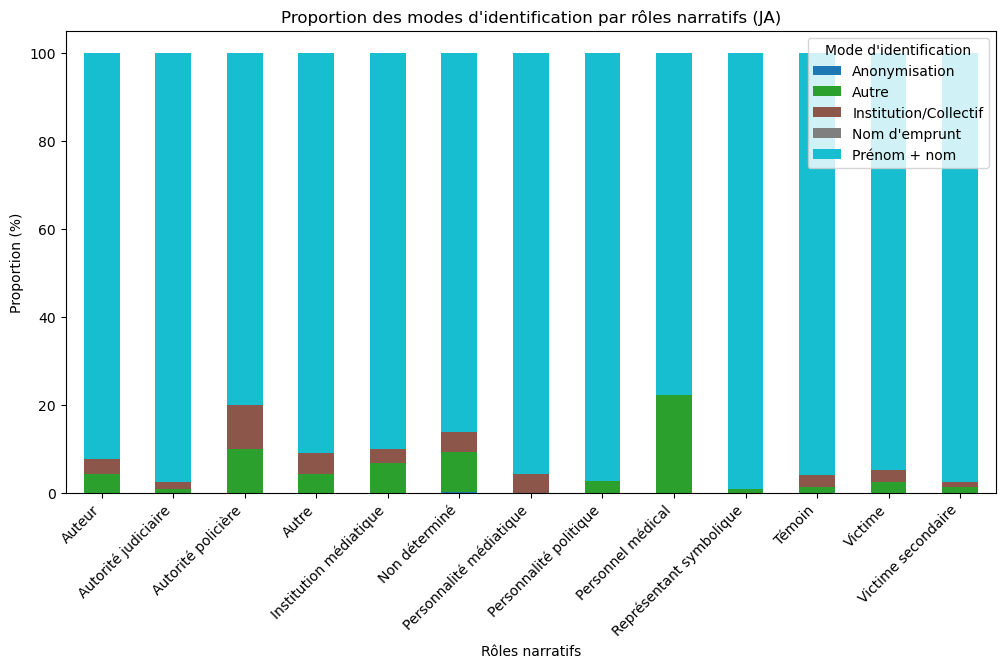

In [18]:

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Proportion des modes d'identification par rôles narratifs (JA)")
plt.xlabel("Rôles narratifs")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Mode d'identification")
plt.show()


In [63]:

import re


# Définition des critères avec analyse syntaxique
criteres = {
    "Voix passive pour parler de la victime": {
        "patterns": [r"\ba été\b", r"\bs'est fait\b", r"\bs'est retrouvée\b"],
        "penalite": -2  
    },
    "Utilisation de modalisateurs de doute": {
        "patterns": [r"\bprétend\b", r"\baffirme\b", r"\bauraient\b", r"\bserait\b"],
        "penalite": -1  
    },
    "Erreurs de terminologie juridique": {
        "patterns": [r"\bagression sexuelle\b"],
        "condition": lambda texte: "viol" in texte.lower(),
        "penalite": -2  
    },
    "Personnalisation excessive de la victime": {
        "patterns": [r"\bportait\b", r"\bses vêtements\b", r"\bses habitudes\b"],
        "penalite": -1  
    },
    "Absence de statistiques et contexte": {
        "patterns": [],
        "condition": lambda texte: not any(x in texte.lower() for x in ["statistiques","les chiffres", "selon une étude"]),
        "penalite": -2  
    }
}

def evaluer_article(texte):
    """Évalue un article en fonction des critères linguistiques et syntaxiques"""
    scores = {critere: 0 for critere in criteres}
    texte_min = texte.lower()

    # Analyse NLP
    doc = nlp(texte)

    for critere, regles in 
        if "patterns" in regles:
            if any(re.search(motif, texte_min) for motif in regles["patterns"]):
                scores[critere] += regles["penalite"]

        if "condition" in regles and regles["condition"](texte_min):
            scores[critere] += regles["penalite"]

        #if critere == "Voix passive pour parler de la victime":
            for token in doc:
                if token.dep_ == "aux" and token.lemma_ == "être":
                    if token.head.dep_ == "ROOT" and token.head.tag_ in ["VPP", "VPS"]:
                        scores[critere] += criteres[critere]["penalite"]

    return scores
    
scores_articles = new_df['texte_propre'].apply(evaluer_article)


df_scores = pd.DataFrame(scores_articles.tolist())

new_df['score_moyen'] = df_scores.mean(axis=1)


SyntaxError: unterminated string literal (detected at line 41) (119705129.py, line 41)

In [20]:
def classifier_article(score_moyen):
    """ Classe un article en fonction de son score moyen """
    if score_moyen > 0.51:
        return "Catégorie 1"
    elif 0.01 <= score_moyen <= 0.5:
        return "Catégorie 2"
    elif -0.49 <= score_moyen <= 0:
        return "Catégorie 3"
    else:
        return "Catégorie 4"

new_df['categorie'] = new_df['score_moyen'].apply(classifier_article)


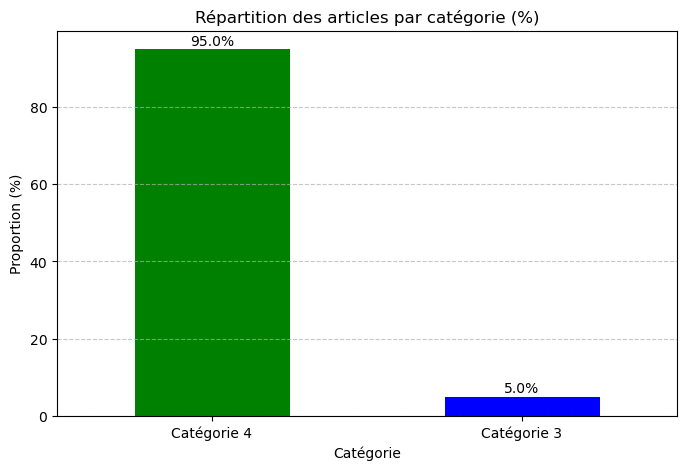

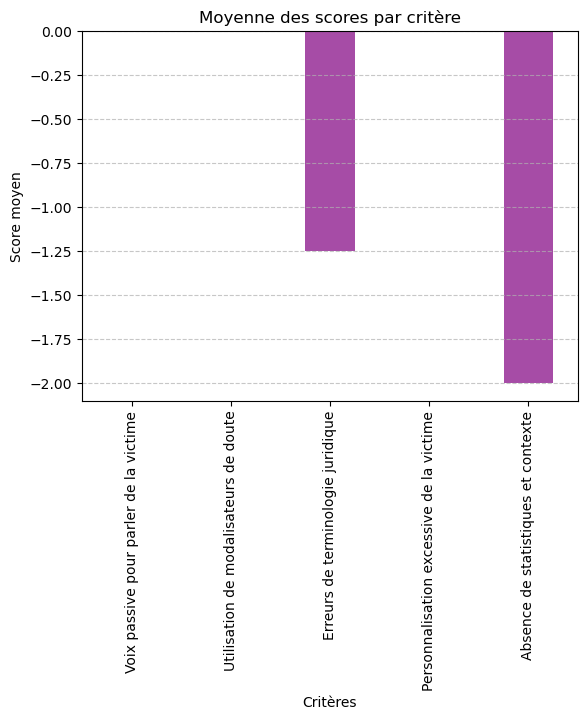

In [21]:
categorie_counts = new_df['categorie'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
categorie_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.title("Répartition des articles par catégorie (%)")
plt.xlabel("Catégorie")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(categorie_counts):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

plt.show()
df_scores.mean().plot(kind='bar', color='purple', alpha=0.7)
plt.title("Moyenne des scores par critère")
plt.ylabel("Score moyen")
plt.xlabel("Critères")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


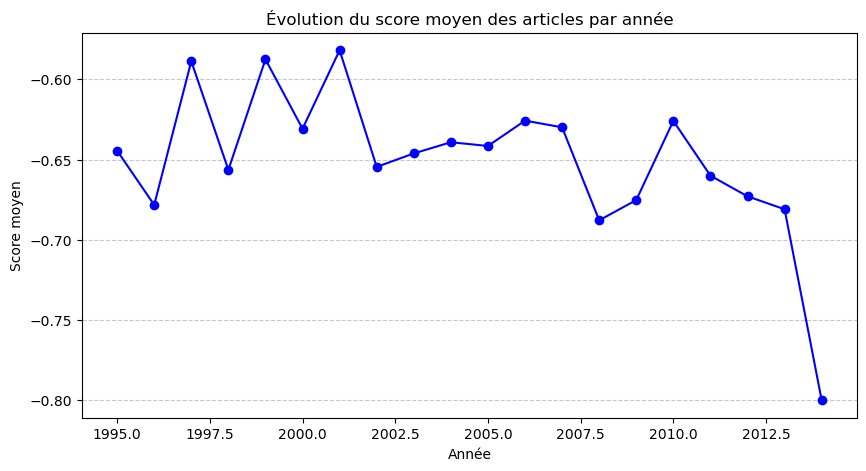

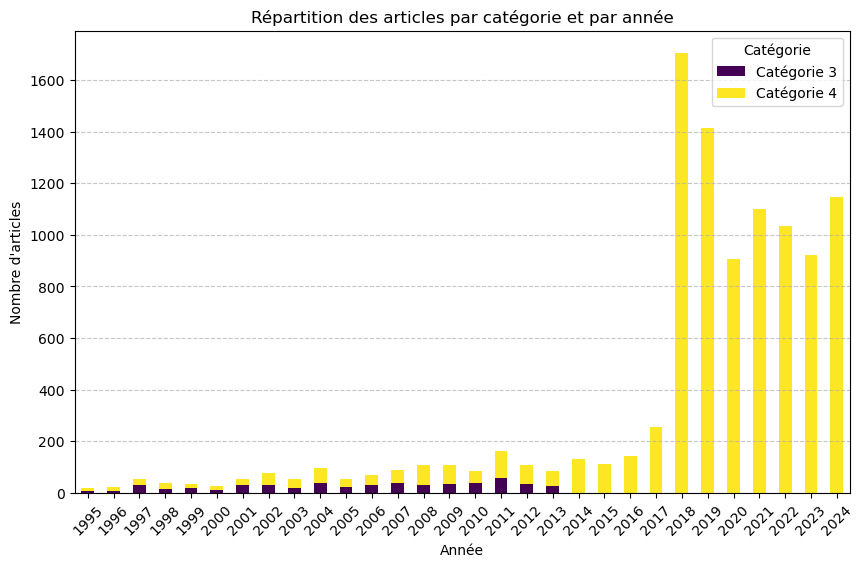

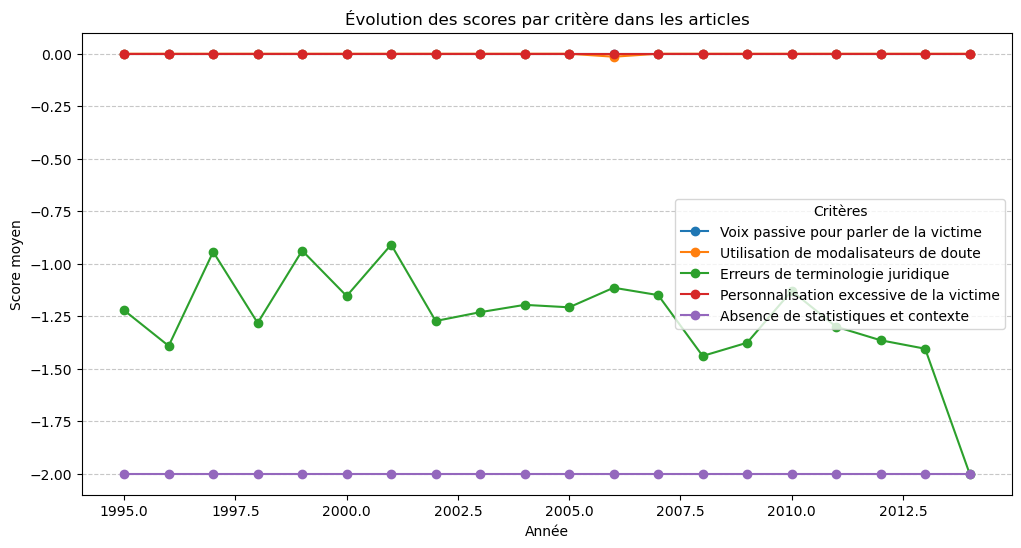

In [22]:

#Évolution du score moyen par année
score_moyen_par_annee = new_df.groupby('annee')['score_moyen'].mean()

plt.figure(figsize=(10, 5))
plt.plot(score_moyen_par_annee.index, score_moyen_par_annee.values, marker='o', linestyle='-', color='blue')
plt.title("Évolution du score moyen des articles par année")
plt.xlabel("Année")
plt.ylabel("Score moyen")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Répartition des catégories par année
categorie_par_annee = new_df.groupby(['annee', 'categorie']).size().unstack(fill_value=0)

categorie_par_annee.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Répartition des articles par catégorie et par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'articles")
plt.xticks(rotation=45)
plt.legend(title="Catégorie")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Moyenne des scores par critère au fil du temps**
df_scores['annee'] = new_df['annee']
score_critere_par_annee = df_scores.groupby('annee').mean()

score_critere_par_annee.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Évolution des scores par critère dans les articles")
plt.xlabel("Année")
plt.ylabel("Score moyen")
plt.legend(title="Critères")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [62]:
import random
index= random.randint(0, len(new_df) - 1)
random_article = new_df.iloc[index]
print(random_article['texte'])
test=evaluer_article(random_article['texte'])
print("Résultats de l'évaluation \n", test)

«Avez-vous vu l’exposition Yoko Ono ? — Non, mais j’ai l’intention de le faire», assure en 1971 un passant, dans un petit film type microtroittoir. Un autre, dérouté, ne l’a malheureusement «pas trouvée»dans les couloirs du MoMA . Et pour cause, contrairement à ce qu’annonçait la réclame pour le «One Woman Show» de Yoko Ono  parue dans les pages du Village Voice , l’exposition en question n’existait tout simplement pas. A l’époque, le musée new-yorkais ne faisait pas grand cas de l’artiste japonaise. Laquelle ne s’était pas démontée pour autant, tournant à son avantage et en geste artistique cette mise au ban, en achetant un encart dans la presse et cultivant le mythe de cette exposition imaginaire où elle aurait orchestré un sonore lâché de mouches imbibées de parfum dans les couloirs du musée pour signifier, malgré tout, sa présence, discrète, fleurie, bavarde et, déjà, subversive.
Féministe, pacifiste, écologisteIl faudra attendre 2012 pour que le musée new-yorkais offre une exposit